# Project: Investigate a Dataset (GapMinder about Egypt and Tunisia)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploring Data</a></li>
<li><a href="#egy_data_collection">Collecting Data For Egypt</a></li>
<li><a href="#tun_data_collection">Collecting Data For Tunisia</a></li>
<li><a href="#egy_explore">Exploring Egypt's Data (Exploraty Analysis)</a></li>
<li><a href="#tun_explore">Exploring Tunisia's Data (Exploraty Analysis)</a></li>
<li><a href="#answers">Answers to questions</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
# Introduction
> 2010 and 2011 were Important years for the Middle East region as they were the begining of the **Arab Spring** (a series of anti-government protests, uprisings, and armed rebellions that spread across much of the Arab) and in the following analysis I'm trying to the effect of these events on *Egypt* and *Tunisia* and also try to figure what made these 2 years very special for example :-
- <a href='#import_export'>What is The effect of the events on both imports and exports ?</a>
- <a href='#age'>What was The population age distribuation in those years ?</a>
- <a href='#gdp'> Which country did better regarding to GDP after the events </a>
- <a href='#internet_usage'>What was the impact of the reveluotions on internet usage</a>
- <a href='#literacy'>which country has more educated adults ?</a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read gdp-total/year
total_gdp = pd.read_csv('gdp_total_yearly_growth.csv')
population_aged_20_to_39 = pd.read_csv('population_aged_20_39_years_both_sexes_percent.csv')
population_aged_15_to_19 = pd.read_csv('population_aged_15_19_years_both_sexes_percent.csv')
internet_users = pd.read_csv('internet_users.csv')
imports_percent_of_gdp = pd.read_csv('imports_percent_of_gdp.csv')
exports_percent_of_gdp = pd.read_csv('exports_percent_of_gdp.csv')
literacy_rate_adult = pd.read_csv('literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv')
human_dev_index = pd.read_csv('hdi_human_development_index.csv')
industry_percent_of_gdp = pd.read_csv('industry_percent_of_gdp.csv')

<a id='eda'></a>
## Exploring the data
Basic exploring to make sure all the data have the same structure 

In [3]:
total_gdp.head(1)

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.55,12.4,4.56,13.6,2.5,20.2,8.04,6.98,14.8,4.47


In [4]:
population_aged_20_to_39.head(1)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,0.287,0.287,0.287,0.287,0.288,0.288,0.288,0.287,0.287,...,0.254,0.252,0.251,0.249,0.248,0.246,0.245,0.244,0.242,0.241


In [5]:
internet_users.head(1)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.55,4.0,5.0,5.45,5.9,7.0,8.26,11.2,13.5,NaN


In [6]:
imports_percent_of_gdp.head(1)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.0702,0.081,0.0935,0.169,0.181,0.214,0.186,0.142,0.152,...,0.667,0.628,0.669,0.626,0.552,0.514,0.434,0.417,0.453,NaN


In [7]:
exports_percent_of_gdp.head(1)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.0413,0.0445,0.0488,0.0917,0.0889,0.113,0.0857,0.0677,0.089,...,0.227,0.186,0.219,0.19,0.196,0.158,0.117,0.0593,0.059,NaN


In [8]:
literacy_rate_adult.head(1)

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,0.182,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.39


In [9]:
human_dev_index.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.3,0.309,0.305,0.3,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.47,0.476,0.479,0.479


In [10]:
industry_percent_of_gdp.head(1)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.219,0.212,0.227,0.212,0.204,0.212,0.221,0.218,0.221,NaN


Create a function that accepts a `country_name`, `DataFrame` as parameters and return this countrie's data from the as a `dataframe`

In [11]:
def get_Country_data_from_df(country_name,df,start_year="2000",end_year = "2013"):
    country_data = df.query(f'country == "{country_name}"').loc[:,start_year:end_year]
    country_data.reset_index(drop=True,inplace=True)
    countr_data_transposed = country_data.T
    countr_data_transposed.reset_index(drop=True,inplace=True)
    return countr_data_transposed
    

<a id='egy_data_collection'></a>
# Collecting Data For Egypt
- create new DataFrame to hold Egypt's Data (egy_data)
- extract Egypt's data from each dataframe 
- append the extracted data to Egypt's Data

In [12]:
egy_data = pd.DataFrame(columns=['year'])
egy_data['year']= (np.arange(2000,2013).tolist())


### Get Egypt's GDP values from 2000 to 2013

In [13]:
egy_gdp = get_Country_data_from_df("Egypt",total_gdp)

#reset the index of the data to make it start with 0
#add the gdp indicator to the data
egy_data['gdp']=egy_gdp[[0]]
egy_data

,year,gdp
0,2000,5.12
1,2001,3.33
2,2002,3.10
3,2003,3.17
4,2004,4.11
5,2005,4.54
6,2006,6.83
7,2007,5.63
8,2008,6.76
9,2009,4.18


### Get Egypt's population aged from 15 to 19 values from 2000 to 2013

In [14]:
egy_population_15_19 = get_Country_data_from_df("Egypt",population_aged_15_to_19)
egy_data['population_15_19_percent']=egy_population_15_19[[0]]
egy_data


,year,gdp,population_15_19_percent
0,2000,5.12,0.1110
1,2001,3.33,0.1120
2,2002,3.10,0.1130
3,2003,3.17,0.1130
4,2004,4.11,0.1130
5,2005,4.54,0.1120
6,2006,6.83,0.1100
7,2007,5.63,0.1080
8,2008,6.76,0.1050
9,2009,4.18,0.1020


### Get Egypt's population aged from 20 to 39 values from 2000 to 2013

In [15]:
egy_population = get_Country_data_from_df("Egypt",population_aged_20_to_39)
egy_data['population_20_39_percent']=egy_population[[0]]
egy_data


,year,gdp,population_15_19_percent,population_20_39_percent
0,2000,5.12,0.1110,0.290
1,2001,3.33,0.1120,0.293
2,2002,3.10,0.1130,0.297
3,2003,3.17,0.1130,0.301
4,2004,4.11,0.1130,0.305
5,2005,4.54,0.1120,0.309
6,2006,6.83,0.1100,0.313
7,2007,5.63,0.1080,0.317
8,2008,6.76,0.1050,0.321
9,2009,4.18,0.1020,0.324


### Get Egypt's internet users percent of the total population values from 2000 to 2013

In [16]:
egy_internet_users = get_Country_data_from_df("Egypt",internet_users)

egy_data['internet_users_percent']=egy_internet_users[[0]]
egy_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent
0,2000,5.12,0.1110,0.290,0.641
1,2001,3.33,0.1120,0.293,0.839
2,2002,3.10,0.1130,0.297,2.720
3,2003,3.17,0.1130,0.301,4.040
4,2004,4.11,0.1130,0.305,11.900
5,2005,4.54,0.1120,0.309,12.800
6,2006,6.83,0.1100,0.313,13.700
7,2007,5.63,0.1080,0.317,16.000
8,2008,6.76,0.1050,0.321,18.000
9,2009,4.18,0.1020,0.324,20.000


### Get Egypt's imports percentage of gdp 2000 to 2013

In [17]:
egy_imports = get_Country_data_from_df("Egypt",imports_percent_of_gdp)

egy_data['imports_percent_of_gdp']=egy_imports[[0]]
egy_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp
0,2000,5.12,0.1110,0.290,0.641,0.228
1,2001,3.33,0.1120,0.293,0.839,0.223
2,2002,3.10,0.1130,0.297,2.720,0.227
3,2003,3.17,0.1130,0.301,4.040,0.244
4,2004,4.11,0.1130,0.305,11.900,0.296
5,2005,4.54,0.1120,0.309,12.800,0.326
6,2006,6.83,0.1100,0.313,13.700,0.316
7,2007,5.63,0.1080,0.317,16.000,0.348
8,2008,6.76,0.1050,0.321,18.000,0.386
9,2009,4.18,0.1020,0.324,20.000,0.316


### Get Egypt's exports percentage of gdp 2000 to 2013

In [18]:
egy_exports = get_Country_data_from_df("Egypt",exports_percent_of_gdp)

egy_data['exports_percent_of_gdp']=egy_exports[[0]]
egy_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp,exports_percent_of_gdp
0,2000,5.12,0.1110,0.290,0.641,0.228,0.162
1,2001,3.33,0.1120,0.293,0.839,0.223,0.175
2,2002,3.10,0.1130,0.297,2.720,0.227,0.183
3,2003,3.17,0.1130,0.301,4.040,0.244,0.218
4,2004,4.11,0.1130,0.305,11.900,0.296,0.282
5,2005,4.54,0.1120,0.309,12.800,0.326,0.303
6,2006,6.83,0.1100,0.313,13.700,0.316,0.299
7,2007,5.63,0.1080,0.317,16.000,0.348,0.302
8,2008,6.76,0.1050,0.321,18.000,0.386,0.330
9,2009,4.18,0.1020,0.324,20.000,0.316,0.250


### Get Egypt's industry percentage out of gdp 2000 to 2011


In [19]:
egy_industry_gdp_percent = get_Country_data_from_df("Egypt",industry_percent_of_gdp)

egy_data['industry_gdp_percent']=egy_industry_gdp_percent[[0]]
egy_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp,exports_percent_of_gdp,industry_gdp_percent
0,2000,5.12,0.1110,0.290,0.641,0.228,0.162,0.308
1,2001,3.33,0.1120,0.293,0.839,0.223,0.175,0.309
2,2002,3.10,0.1130,0.297,2.720,0.227,0.183,0.322
3,2003,3.17,0.1130,0.301,4.040,0.244,0.218,0.334
4,2004,4.11,0.1130,0.305,11.900,0.296,0.282,0.347
5,2005,4.54,0.1120,0.309,12.800,0.326,0.303,0.341
6,2006,6.83,0.1100,0.313,13.700,0.316,0.299,0.362
7,2007,5.63,0.1080,0.317,16.000,0.348,0.302,0.350
8,2008,6.76,0.1050,0.321,18.000,0.386,0.330,0.362
9,2009,4.18,0.1020,0.324,20.000,0.316,0.250,0.358


### Get Egypt's literacy adult percentage of gdp 2000 to 2011 (adults who can read and write)

In [20]:
egy_literacy_adult = get_Country_data_from_df("Egypt",literacy_rate_adult,end_year = "2011")

egy_data['literacy_adult']=egy_literacy_adult[[0]]
egy_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp,exports_percent_of_gdp,industry_gdp_percent,literacy_adult
0,2000,5.12,0.1110,0.290,0.641,0.228,0.162,0.308,NaN
1,2001,3.33,0.1120,0.293,0.839,0.223,0.175,0.309,NaN
2,2002,3.10,0.1130,0.297,2.720,0.227,0.183,0.322,NaN
3,2003,3.17,0.1130,0.301,4.040,0.244,0.218,0.334,NaN
4,2004,4.11,0.1130,0.305,11.900,0.296,0.282,0.347,NaN
5,2005,4.54,0.1120,0.309,12.800,0.326,0.303,0.341,0.714
6,2006,6.83,0.1100,0.313,13.700,0.316,0.299,0.362,0.664
7,2007,5.63,0.1080,0.317,16.000,0.348,0.302,0.350,NaN
8,2008,6.76,0.1050,0.321,18.000,0.386,0.330,0.362,NaN
9,2009,4.18,0.1020,0.324,20.000,0.316,0.250,0.358,NaN


### Get Egypt's human development index from 2000 to 2013


In [21]:
egy_hdi = get_Country_data_from_df("Egypt",human_dev_index)

egy_data['hdi']=egy_hdi[[0]]
egy_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp,exports_percent_of_gdp,industry_gdp_percent,literacy_adult,hdi
0,2000,5.12,0.1110,0.290,0.641,0.228,0.162,0.308,NaN,0.612
1,2001,3.33,0.1120,0.293,0.839,0.223,0.175,0.309,NaN,0.617
2,2002,3.10,0.1130,0.297,2.720,0.227,0.183,0.322,NaN,0.621
3,2003,3.17,0.1130,0.301,4.040,0.244,0.218,0.334,NaN,0.623
4,2004,4.11,0.1130,0.305,11.900,0.296,0.282,0.347,NaN,0.629
5,2005,4.54,0.1120,0.309,12.800,0.326,0.303,0.341,0.714,0.636
6,2006,6.83,0.1100,0.313,13.700,0.316,0.299,0.362,0.664,0.644
7,2007,5.63,0.1080,0.317,16.000,0.348,0.302,0.350,NaN,0.651
8,2008,6.76,0.1050,0.321,18.000,0.386,0.330,0.362,NaN,0.659
9,2009,4.18,0.1020,0.324,20.000,0.316,0.250,0.358,NaN,0.665


#### Saving Egypt's Data into a csv file to be used later

In [22]:
egy_data.to_csv('egy_data.csv')

<a id='egy_explore'></a>

# Explore Egypt's Data (Exploraty Analysis)

In [23]:
egy_data.isnull().sum()

year                        0
gdp                         0
population_15_19_percent    0
population_20_39_percent    0
internet_users_percent      0
imports_percent_of_gdp      0
exports_percent_of_gdp      0
industry_gdp_percent        0
literacy_adult              9
hdi                         0
dtype: int64

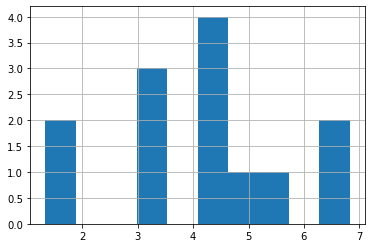

In [24]:
egy_data.gdp.hist();

Text(0.5, 1.0, 'GDP for Egypt')

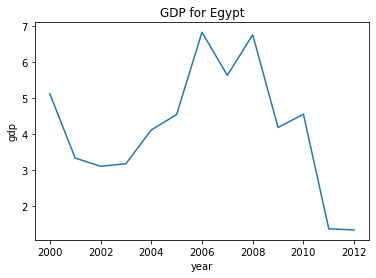

In [25]:
plt.plot(egy_data['year'],egy_data['gdp']);
plt.ylabel('gdp')
plt.xlabel('year')
plt.title('GDP for Egypt')

Text(0.5, 1.0, 'Internet users in Egypt')

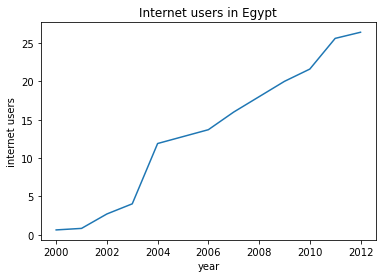

In [26]:
plt.plot(egy_data['year'],egy_data['internet_users_percent']);
plt.ylabel('internet users')
plt.xlabel('year')
plt.title('Internet users in Egypt')

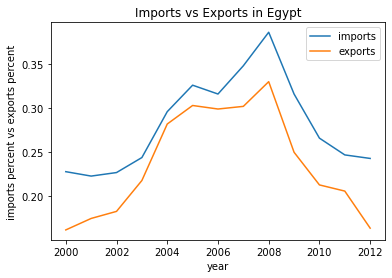

In [27]:
def plot_Egypt_imports_and_exports():
    plt.plot(egy_data['year'],egy_data['imports_percent_of_gdp'],label='imports');
    plt.plot(egy_data['year'],egy_data['exports_percent_of_gdp'], label='exports');

    plt.ylabel('imports percent vs exports percent')
    plt.xlabel('year')
    plt.legend()
    plt.title('Imports vs Exports in Egypt')
#---------------------------------------
plot_Egypt_imports_and_exports()

Text(0.5, 1.0, 'population percent for people between 15:19 years old')

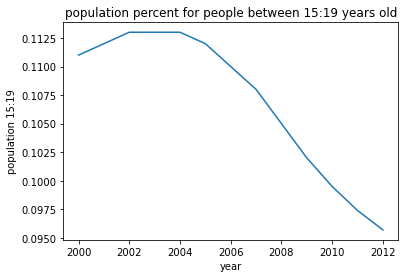

In [28]:
plt.plot(egy_data['year'],egy_data['population_15_19_percent']);
plt.ylabel('population 15:19')
plt.xlabel('year')
plt.title('population percent for people between 15:19 years old')

Text(0.5, 1.0, 'population percent for people between 20:39 years old')

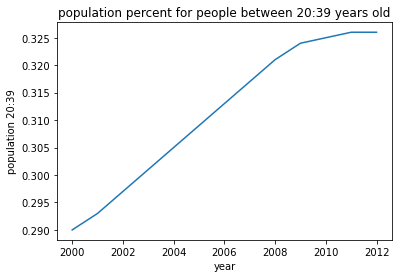

In [29]:
plt.plot(egy_data['year'],egy_data['population_20_39_percent']);
plt.ylabel('population 20:39')
plt.xlabel('year')
plt.title('population percent for people between 20:39 years old')

<a id='tun_data_collection'></a>

# Collecting the Data for Tunisia 
- create new DataFrame to hold Tunisia's Data (tun_data)
- extract Tunisia's data from each dataframe 
- append the extracted data to Tunisia's Data

In [30]:
tun_data = pd.DataFrame(columns=['year'])
tun_data['year']= (np.arange(2000,2013).tolist())


In [31]:
egy_data.columns

Index(['year', 'gdp', 'population_15_19_percent', 'population_20_39_percent',
       'internet_users_percent', 'imports_percent_of_gdp',
       'exports_percent_of_gdp', 'industry_gdp_percent', 'literacy_adult',
       'hdi'],
      dtype='object')

In [32]:
tun_gdp = get_Country_data_from_df("Tunisia",total_gdp)

#reset the index of the data to make it start with 0
#add the gdp indicator to the data
tun_data['gdp']=tun_gdp[[0]]
tun_data

,year,gdp
0,2000,4.59
1,2001,4.77
2,2002,1.55
3,2003,5.46
4,2004,5.91
5,2005,4.00
6,2006,5.74
7,2007,6.43
8,2008,4.67
9,2009,3.19


### Get Tunisia's population aged from 20 to 39 values from 2000 to 2013


In [33]:
tun_population_15_19 = get_Country_data_from_df("Tunisia",population_aged_15_to_19)

#reset the index of the data to make it start with 0
#add the gdp indicator to the data
tun_data['population_15_19_percent']=tun_population_15_19[[0]]
tun_data

,year,gdp,population_15_19_percent
0,2000,4.59,0.1070
1,2001,4.77,0.1080
2,2002,1.55,0.1080
3,2003,5.46,0.1080
4,2004,5.91,0.1070
5,2005,4.00,0.1060
6,2006,5.74,0.1030
7,2007,6.43,0.0994
8,2008,4.67,0.0959
9,2009,3.19,0.0923


### Get Tunisia's population aged from 20 to 39 values from 2000 to 2013


In [34]:
tun_population_20_39 = get_Country_data_from_df("Tunisia",population_aged_20_to_39)

#reset the index of the data to make it start with 0
#add the gdp indicator to the data
tun_data['population_20_39_percent']=tun_population_20_39[[0]]
tun_data

,year,gdp,population_15_19_percent,population_20_39_percent
0,2000,4.59,0.1070,0.326
1,2001,4.77,0.1080,0.328
2,2002,1.55,0.1080,0.329
3,2003,5.46,0.1080,0.331
4,2004,5.91,0.1070,0.332
5,2005,4.00,0.1060,0.334
6,2006,5.74,0.1030,0.336
7,2007,6.43,0.0994,0.339
8,2008,4.67,0.0959,0.340
9,2009,3.19,0.0923,0.341


### Get Tunisia's internet users percent of the total population values from 2000 to 2013

In [35]:
tun_internet_users = get_Country_data_from_df("Tunisia",internet_users)

#reset the index of the data to make it start with 0
#add the gdp indicator to the data
tun_data['internet_users_percent']=tun_internet_users[[0]]
tun_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent
0,2000,4.59,0.1070,0.326,2.75
1,2001,4.77,0.1080,0.328,4.30
2,2002,1.55,0.1080,0.329,5.25
3,2003,5.46,0.1080,0.331,6.49
4,2004,5.91,0.1070,0.332,8.53
5,2005,4.00,0.1060,0.334,9.66
6,2006,5.74,0.1030,0.336,13.00
7,2007,6.43,0.0994,0.339,17.10
8,2008,4.67,0.0959,0.340,27.50
9,2009,3.19,0.0923,0.341,34.10


### Get Tunisia's imports percentage of gdp 2000 to 2013

In [36]:
tun_imports = get_Country_data_from_df("Tunisia",imports_percent_of_gdp)

#reset the index of the data to make it start with 0
#add the gdp indicator to the data
tun_data['imports_percent_of_gdp']=tun_imports[[0]]
tun_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp
0,2000,4.59,0.1070,0.326,2.75,0.429
1,2001,4.77,0.1080,0.328,4.30,0.467
2,2002,1.55,0.1080,0.329,5.25,0.446
3,2003,5.46,0.1080,0.331,6.49,0.429
4,2004,5.91,0.1070,0.332,8.53,0.447
5,2005,4.00,0.1060,0.334,9.66,0.453
6,2006,5.74,0.1030,0.336,13.00,0.479
7,2007,6.43,0.0994,0.339,17.10,0.530
8,2008,4.67,0.0959,0.340,27.50,0.587
9,2009,3.19,0.0923,0.341,34.10,0.480


In [37]:
tun_exports = get_Country_data_from_df("Tunisia",exports_percent_of_gdp)

#reset the index of the data to make it start with 0
#add the gdp indicator to the data
tun_data['exports_percent_of_gdp']=tun_exports[[0]]
tun_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp,exports_percent_of_gdp
0,2000,4.59,0.1070,0.326,2.75,0.429,0.395
1,2001,4.77,0.1080,0.328,4.30,0.467,0.428
2,2002,1.55,0.1080,0.329,5.25,0.446,0.408
3,2003,5.46,0.1080,0.331,6.49,0.429,0.395
4,2004,5.91,0.1070,0.332,8.53,0.447,0.422
5,2005,4.00,0.1060,0.334,9.66,0.453,0.449
6,2006,5.74,0.1030,0.336,13.00,0.479,0.460
7,2007,6.43,0.0994,0.339,17.10,0.530,0.511
8,2008,4.67,0.0959,0.340,27.50,0.587,0.557
9,2009,3.19,0.0923,0.341,34.10,0.480,0.450


### Get Tunisia's industry out of gdp percentage 2000 to 2013


In [38]:
tun_industry_gdp_percent = get_Country_data_from_df("Tunisia",industry_percent_of_gdp)

tun_data['industry_gdp_percent']=tun_industry_gdp_percent[[0]]
tun_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp,exports_percent_of_gdp,industry_gdp_percent
0,2000,4.59,0.1070,0.326,2.75,0.429,0.395,0.267
1,2001,4.77,0.1080,0.328,4.30,0.467,0.428,0.265
2,2002,1.55,0.1080,0.329,5.25,0.446,0.408,0.266
3,2003,5.46,0.1080,0.331,6.49,0.429,0.395,0.253
4,2004,5.91,0.1070,0.332,8.53,0.447,0.422,0.255
5,2005,4.00,0.1060,0.334,9.66,0.453,0.449,0.266
6,2006,5.74,0.1030,0.336,13.00,0.479,0.460,0.267
7,2007,6.43,0.0994,0.339,17.10,0.530,0.511,0.287
8,2008,4.67,0.0959,0.340,27.50,0.587,0.557,0.315
9,2009,3.19,0.0923,0.341,34.10,0.480,0.450,0.278


### Get Tunisia's literacy adult percentage of gdp 2000 to 2011 (adults who can read and write)

In [39]:
tun_literacy_adult = get_Country_data_from_df("Tunisia",literacy_rate_adult,end_year="2011")

tun_data['literacy_adult']=tun_literacy_adult[[0]]
tun_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp,exports_percent_of_gdp,industry_gdp_percent,literacy_adult
0,2000,4.59,0.1070,0.326,2.75,0.429,0.395,0.267,NaN
1,2001,4.77,0.1080,0.328,4.30,0.467,0.428,0.265,NaN
2,2002,1.55,0.1080,0.329,5.25,0.446,0.408,0.266,NaN
3,2003,5.46,0.1080,0.331,6.49,0.429,0.395,0.253,NaN
4,2004,5.91,0.1070,0.332,8.53,0.447,0.422,0.255,0.743
5,2005,4.00,0.1060,0.334,9.66,0.453,0.449,0.266,NaN
6,2006,5.74,0.1030,0.336,13.00,0.479,0.460,0.267,NaN
7,2007,6.43,0.0994,0.339,17.10,0.530,0.511,0.287,0.772
8,2008,4.67,0.0959,0.340,27.50,0.587,0.557,0.315,0.776
9,2009,3.19,0.0923,0.341,34.10,0.480,0.450,0.278,NaN


### Get Tunisia's human development index from 2000 to 2013


In [40]:
tun_hdi = get_Country_data_from_df("Tunisia",human_dev_index)

tun_data['hdi']=tun_hdi[[0]]
tun_data

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp,exports_percent_of_gdp,industry_gdp_percent,literacy_adult,hdi
0,2000,4.59,0.1070,0.326,2.75,0.429,0.395,0.267,NaN,0.654
1,2001,4.77,0.1080,0.328,4.30,0.467,0.428,0.265,NaN,0.662
2,2002,1.55,0.1080,0.329,5.25,0.446,0.408,0.266,NaN,0.667
3,2003,5.46,0.1080,0.331,6.49,0.429,0.395,0.253,NaN,0.673
4,2004,5.91,0.1070,0.332,8.53,0.447,0.422,0.255,0.743,0.683
5,2005,4.00,0.1060,0.334,9.66,0.453,0.449,0.266,NaN,0.689
6,2006,5.74,0.1030,0.336,13.00,0.479,0.460,0.267,NaN,0.695
7,2007,6.43,0.0994,0.339,17.10,0.530,0.511,0.287,0.772,0.701
8,2008,4.67,0.0959,0.340,27.50,0.587,0.557,0.315,0.776,0.706
9,2009,3.19,0.0923,0.341,34.10,0.480,0.450,0.278,NaN,0.710


#### Saving Tunisia's Data into a csv file to be used later

In [41]:
tun_data.to_csv('tunisia_data.csv')

<a id='tun_explore'></a>
# Exploring Tunisia's Data (Exploraty Analysis)


In [42]:
tun_data.isnull().sum()

year                        0
gdp                         0
population_15_19_percent    0
population_20_39_percent    0
internet_users_percent      0
imports_percent_of_gdp      0
exports_percent_of_gdp      0
industry_gdp_percent        0
literacy_adult              9
hdi                         0
dtype: int64

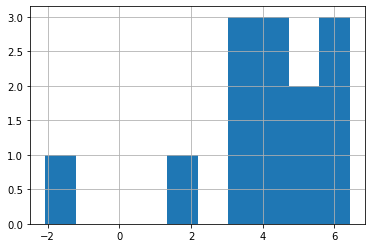

In [43]:
tun_data.gdp.hist();

Text(0.5, 1.0, 'GDP for Tunisia')

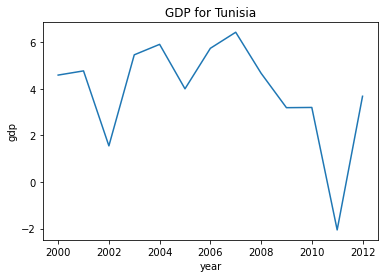

In [44]:
plt.plot(tun_data['year'],tun_data['gdp']);
plt.ylabel('gdp')
plt.xlabel('year')
plt.title('GDP for Tunisia')

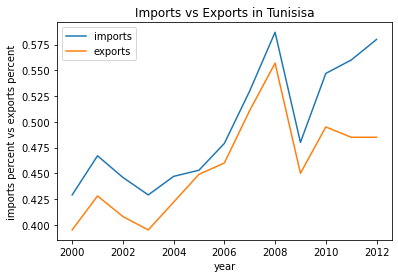

In [45]:
def plot_tun_imports_exports():
    plt.plot(tun_data['year'],tun_data['imports_percent_of_gdp'],label='imports');
    plt.plot(tun_data['year'],tun_data['exports_percent_of_gdp'], label='exports');

    plt.ylabel('imports percent vs exports percent')
    plt.xlabel('year')
    plt.legend()
    plt.title('Imports vs Exports in Tunisisa')
#---------------------------------
plot_tun_imports_exports()

Text(0.5, 1.0, 'Internet users in Tunisia')

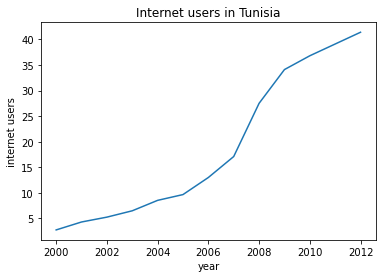

In [46]:
plt.plot(tun_data['year'],tun_data['internet_users_percent']);
plt.ylabel('internet users')
plt.xlabel('year')
plt.title('Internet users in Tunisia')

Text(0.5, 1.0, 'population percent for tunisian people between 20:39 years old')

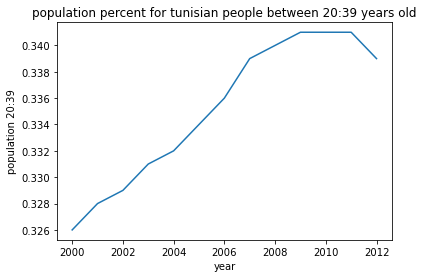

In [47]:
plt.plot(tun_data['year'],tun_data['population_20_39_percent'],label='tun');
plt.ylabel('population 20:39')
plt.xlabel('year')
plt.title('population percent for tunisian people between 20:39 years old')

Text(0.5, 1.0, 'population percent for tunisian people between 15:19 years old')

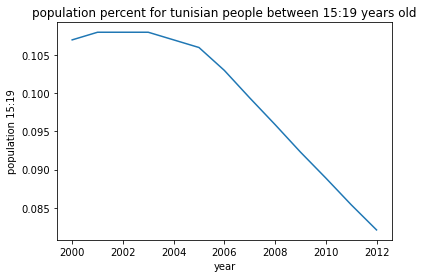

In [48]:
plt.plot(tun_data['year'],tun_data['population_15_19_percent'],label='tun');
plt.ylabel('population 15:19')
plt.xlabel('year')
plt.title('population percent for tunisian people between 15:19 years old')

<a id='answers'></a>
# Answers to questions

In [49]:
egy_data.head(1)

,year,gdp,population_15_19_percent,population_20_39_percent,internet_users_percent,imports_percent_of_gdp,exports_percent_of_gdp,industry_gdp_percent,literacy_adult,hdi
0,2000,5.12,0.111,0.29,0.641,0.228,0.162,0.308,NaN,0.612


<a id='import_export'></a>
### What is The effect of the events on both imports and exports For Egypt ?
based on this graph in the cell below we can conclude that:-
- the imports was not affected it kept its linear negative curve since 2008
- the exports was damaged badly in 2012 more than its usual curve


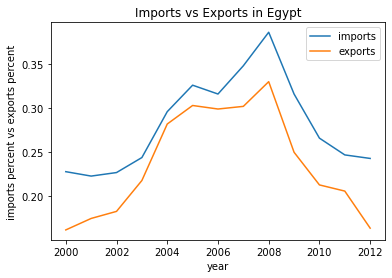

In [50]:
plot_Egypt_imports_and_exports()


### What is The effect of the events on both imports and exports For Tunisia ?
based on this graph in the cell below we can conclude that:-
- the imports took a bad hit in 2011 and then returned to normal in 2012
- the exports were damaged badly in 201 and 2012 after its curve was positive it turned negative 


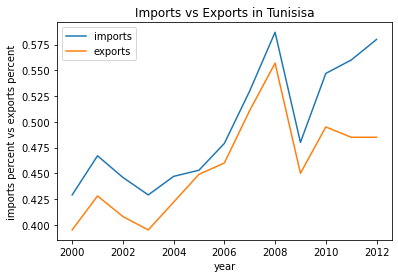

In [51]:
plot_tun_imports_exports()

<a id='age'></a>
### The effect of age distribution on the reveloution in both Egypt and Tunusia
Based on the graph and the analysis below we can conclude that :-
- age was an Important factor as in both Egypt and Tunuisa the people aged 20-39 was the maximum in the years from 2000-2013
  which proves that the youth has a huge impact on the political life in the countries


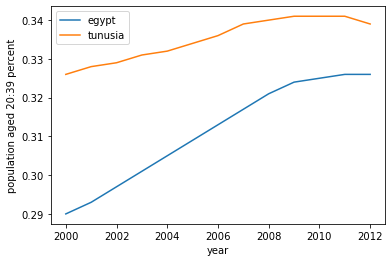

In [52]:
plt.plot(egy_data['year'],egy_data['population_20_39_percent'],label='egypt');
plt.plot(tun_data['year'],tun_data['population_20_39_percent'], label='tunusia');

plt.ylabel('population aged 20:39 percent')
plt.xlabel('year')
plt.legend()

In [53]:
max = tun_data['population_20_39_percent'].max()
max_pop_tun =tun_data.query(f"population_20_39_percent == {max}")
max_pop_tun['year']

9     2009
10    2010
11    2011
Name: year, dtype: int64

In [54]:
max = egy_data['population_20_39_percent'].max()
max_pop_egy =egy_data.query(f"population_20_39_percent == {max}")
max_pop_egy['year']

11    2011
12    2012
Name: year, dtype: int64

<a id='internet_usage'></a>
# Internet usage After the reveluotion

### Internet Usage before and after the reveloution in Egypt
- To get the impact of the reveloution on the internet usage we need to get the change between the years for the internet usage 
- based on this we can find that Egypt internet usage increased with big difference in 2 years *2004* and *2011*
- 2004 was the year that the fast Internet ADSL was used in Homes
- 2011 was after the reveluotion where the Egyption people started using the internet more 

Text(0.5, 0, 'year')

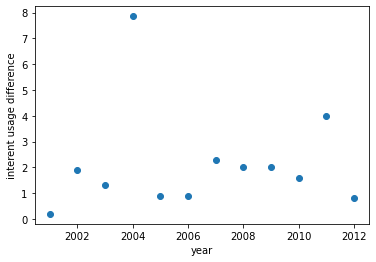

In [55]:
intenet_usage_egypt = egy_data.internet_users_percent

plt.scatter(egy_data['year'],intenet_usage_egypt.diff());
plt.ylabel('interent usage difference')
plt.xlabel('year')


### Internet Usage before and after the reveloutions in Tunuisia
- To get the impact of the reveloution on the internet usage we need to get the change between the years for the internet usage 
- based on this we can find that Egypt internet usage increased with big difference  *2008*
- there were no major change in the number of users as already about **36%** of the population were using the internet in *2010*

Text(0.5, 0, 'year')

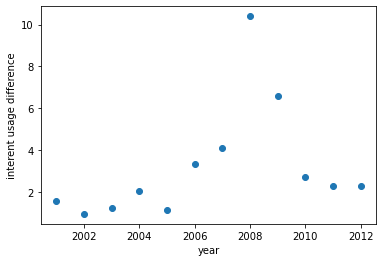

In [56]:
intenet_usage_tun = tun_data.internet_users_percent

plt.scatter(tun_data['year'],intenet_usage_tun.diff());
plt.ylabel('interent usage difference')
plt.xlabel('year')

In [57]:
tun_data.query(f'year == 2010')['internet_users_percent']

10    36.8
Name: internet_users_percent, dtype: float64

<a id='gdp'></a>
### Which country did better regarding to GDP after the events 
from the below graph we can find that even Tunisian's GDP were lower than the Egyption in 2010 but Tunisia were able to do better and even get a higher gdp in 2012

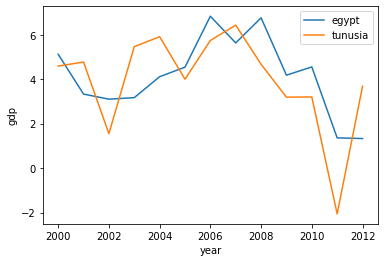

In [58]:
plt.plot(egy_data['year'],egy_data['gdp'],label='egypt');
plt.plot(tun_data['year'],tun_data['gdp'], label='tunusia');

plt.ylabel('gdp')
plt.xlabel('year')
plt.legend()

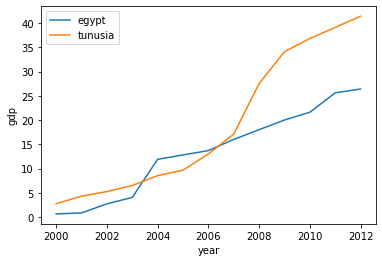

In [59]:
plt.plot(egy_data['year'],egy_data['internet_users_percent'],label='egypt');
plt.plot(tun_data['year'],tun_data['internet_users_percent'], label='tunusia');

plt.ylabel('gdp')
plt.xlabel('year')
plt.legend()

In [60]:
egy_data.columns

Index(['year', 'gdp', 'population_15_19_percent', 'population_20_39_percent',
       'internet_users_percent', 'imports_percent_of_gdp',
       'exports_percent_of_gdp', 'industry_gdp_percent', 'literacy_adult',
       'hdi'],
      dtype='object')

<a id='literacy'></a>
### Which country has more educated Adults ? 
If we explore the literacy dataset we would find that there are a lot of nulls in it but we can get the mean from the data we have and get our conclusion based on that

- Tunisisa Has more educated Adults who can read and write 

In [61]:
egy_data.literacy_adult.mean()

0.707

In [62]:
tun_data.literacy_adult.mean()

0.7705

<a id='conclusion'></a>
# Conclusion
From the Data Analysis we can find that :-

- Change is hard and doesn't come cheap both Egypt and Tunuisia went through alot and lost from an economic point of view
- Youth do the change as we have seen the largest percentage of youth in both countries was from 2010:2012
- Communication and Internet is affected by different events for example Egyptians users of Interent were increased by *4%* after the events of the reveloution
- Tunisian's has more literacy by about *7%* than Egyptions which helped to avoid conflicts like the ones happened in Egypt and they were able to get their **GDP** up faster and better than the Egyptions after the reveloutions 
## Limitations in The DataSet
- The years were not consistent in all of the data for example some csv files contained till the year 2011 and others to the year 2018 (this inconsistency was a road block to find more about the relationships between different variables in the past 10 years )
- Most of the data was up to 2013 only which made it hard to find the current progress in the countries after the reveloutions, espically Egypt as It still had some chaos uptill 2014 
- The `literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv` file had a lot of `Nan` values which made me depend only on the `mean` of the values